In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

In [22]:
housing = pd.read_csv('../../data/competition/housing-classification-iter6.csv')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   TotalBsmtSF    1460 non-null   int64  
 3   BedroomAbvGr   1460 non-null   int64  
 4   Fireplaces     1460 non-null   int64  
 5   PoolArea       1460 non-null   int64  
 6   GarageCars     1460 non-null   int64  
 7   WoodDeckSF     1460 non-null   int64  
 8   ScreenPorch    1460 non-null   int64  
 9   Expensive      1460 non-null   int64  
 10  MSZoning       1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Heating        1460 non-null   object 
 13  Street         1460 non-null   object 
 14  CentralAir     1460 non-null   object 
 15  Foundation     1460 non-null   object 
 16  ExterQual      1460 non-null   object 
 17  ExterCond      1460 non-null   object 
 18  BsmtQual

# Cheking the data

In [23]:
housing.isna().sum()

LotArea             0
LotFrontage       259
TotalBsmtSF         0
BedroomAbvGr        0
Fireplaces          0
                 ... 
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
Length: 81, dtype: int64

In [24]:
housing.duplicated().sum()

0

# Split the dataset

In [25]:
list_col = ['LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','YearBuilt','TotalBsmtSF','YearBuilt','GrLivArea','FullBath','GrLivArea','Fireplaces','GarageCars','PoolArea','Utilities','Neighborhood','Condition1','Condition2','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Foundation','BsmtQual','BsmtCond','Heating','CentralAir','KitchenQual','Functional','Heating']

In [26]:
X = housing.loc[:,list_col]
y = housing['Expensive']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=8)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Define Numerical and Categorical columns to use

Using SimpleImputer fill in the missing values

In [27]:
num_col = ['LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','YearBuilt','TotalBsmtSF','YearBuilt','GrLivArea','FullBath','GrLivArea','Fireplaces','GarageCars','PoolArea']

imp_num = SimpleImputer(strategy='median')

X_train[num_col] = imp_num.fit_transform(X_train[num_col])
X_test[num_col] = imp_num.fit_transform(X_test[num_col])

In [28]:
cat_col = ['Utilities','Neighborhood','Condition1','Condition2','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Foundation','BsmtQual','BsmtCond','Heating','CentralAir','KitchenQual','Functional','Heating']

imp_cat=SimpleImputer(strategy='most_frequent')

X_train[cat_col] = imp_cat.fit_transform(X_train[cat_col])
X_test[cat_col] = imp_cat.fit_transform(X_test[cat_col])

## OneHotEncoder - Encoding the variables

In [29]:
enc = OneHotEncoder(drop = 'first', sparse = False)

In [30]:
X_train_enc = enc.fit_transform(X_train[cat_col])
X_train_enc = pd.DataFrame(X_train_enc, columns=list(enc.get_feature_names_out()), index=X_train.index)
X_train = pd.concat([X_train, X_train_enc], axis=1, ignore_index=False).drop(columns=cat_col)

In [31]:
X_test_enc = enc.transform(X_test[cat_col])
X_test_enc = pd.DataFrame(X_test_enc, columns=list(enc.get_feature_names_out()), index=X_test.index)
X_test = pd.concat([X_test, X_test_enc], axis=1, ignore_index=False).drop(columns=cat_col)

## DecisionTree

In [32]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

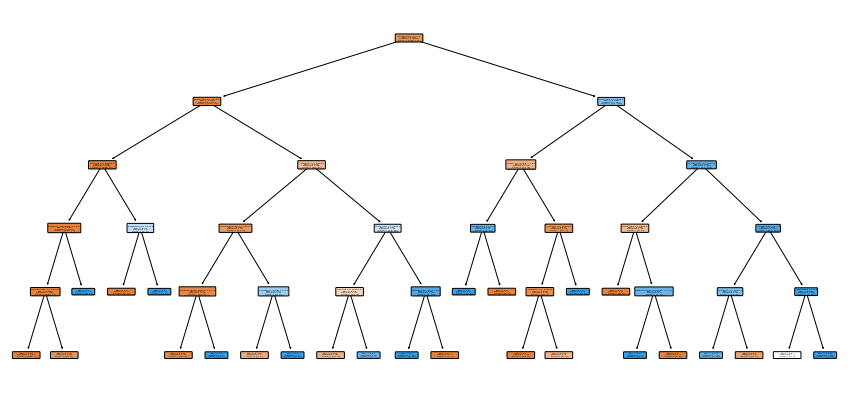

In [14]:
plt.figure(figsize=(15, 7))
plot_tree(
    tree, 
    filled=True,
    rounded=True,
    class_names=['Not Expensive', 'Expensive'],
    feature_names=X_train.columns
    );

In [33]:
#accuracy train set:
preds = tree.predict(X_train)
accuracy_score(preds, y_train)

0.9708904109589042

In [34]:
# accuracy test set:
preds = tree.predict(X_test)
decision_hotencoded = accuracy_score(preds, y_test)
decision_hotencoded

0.9041095890410958

# Test dataset

In [35]:
housing1 = pd.read_csv('../../data/competition/test.csv')

In [36]:
test = housing1[list_col].copy()
test[num_col] = imp_num.transform(test[num_col])
test[cat_col] = imp_cat.transform(test[cat_col])

In [37]:
test_enc = enc.transform(test[cat_col])
test_enc = pd.DataFrame(test_enc, columns=list(enc.get_feature_names()), index=test.index)
test = pd.concat([test, test_enc], axis=1, ignore_index=False).drop(columns=cat_col)

C:\Users\akbar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [38]:
test_preds = tree.predict(test)
pd.DataFrame({
    'Id': housing1['Id'], 
    'Expensive' : test_preds
}).to_csv('test_final.csv',index=False)

C:\Users\akbar\anaconda3\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- x0_NoSeWa
- x10_Fa
- x10_Gd
- x10_TA
- x11_Gd
- ...
Feature names seen at fit time, yet now missing:
- BsmtCond_Gd
- BsmtCond_Po
- BsmtCond_TA
- BsmtQual_Fa
- BsmtQual_Gd
- ...

  warnings.warn(message, FutureWarning)
